In [117]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Kernels

In [118]:
def poly_kernel(X, gamma=1):
    return np.square(X)


def rbf_kernel(X, gamma):
    return np.exp(gamma * np.square(X))

## Functions to Predict, Check Score, Plot Decision Boundary

In [119]:
def predict(X, w, b):
    r = np.dot(X, w.T) + b
    r = np.where(r >= 0, 1, 0)
    return r


def score(y_pred, y_true):
    num = np.sum(y_pred == y_true)
    return num / len(y_true)


def plot_decision_boudary(clf, X, y, kernel=None, gamma=1):
    w = clf._get_coef()[0]
    b = clf.intercept_

    pad = 0.25
    h = 1000
    x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))

    plt.scatter(X[:, 0], X[:, 1], c=y)

    # if kernel is not None:
    #     F = w[0] * x1 + w[1] * x2 + w[2] * kernel(x1, gamma) + w[3] * kernel(x2, gamma) + b
    # else:
    #     F = w[0] * x1 + w[1] * x2 + b
    # plt.contour(x1, x2, F, [0], colors='red')

    # start custom
    if kernel is not None:
        Z = predict(np.c_[x1.ravel(), x2.ravel(), kernel(x1.ravel(), gamma), kernel(x2.ravel(), gamma)], w, b)
    else:
        Z = predict(np.c_[x1.ravel(), x2.ravel()], w, b)
    Z = Z.reshape(x1.shape)
    plt.contourf(x1, x2, Z, alpha=0.2)
    # end custom

    return plt


def f1_score(y_true, y_pred):
    y_true = set(y_true)
    y_pred = set(y_pred)
    cross_size = len(y_true & y_pred)
    if cross_size == 0: return 0.
    p = 1. * cross_size / len(y_pred)
    r = 1. * cross_size / len(y_true)
    return np.round(2 * p * r / (p + r), 2)

# Dataset 1

In [120]:
filename = 'data_1.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 1: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 1:  100
Distribution of samples among different classes:  [50 50]


## (i) Scatter the data

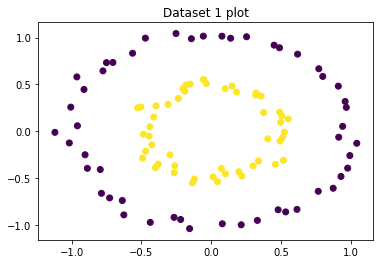

In [110]:
plt.figure()
plt.title('Dataset 1 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset1_plot.png')
plt.show()

## (ii) Plot the dataset with decision boundaries corresponding to the kernels used

1.0


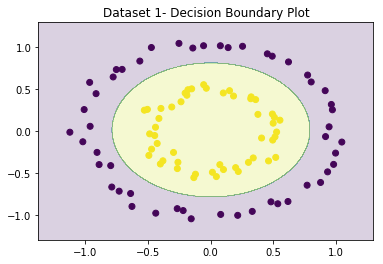

In [112]:
kX = np.hstack((X, poly_kernel(X)))
clf = SVC(kernel='linear')
clf.fit(kX, y)
r = predict(kX, clf._get_coef()[0], clf.intercept_)
print(score(r, y))
p = plot_decision_boudary(clf, kX, y, poly_kernel)
p.title('Dataset 1- Decision Boundary Plot')
p.savefig('dataset1_decision_boundary_plot.png')
p.show()

## (iii) Soft margin SVM with linear kernel

0.4
0.67


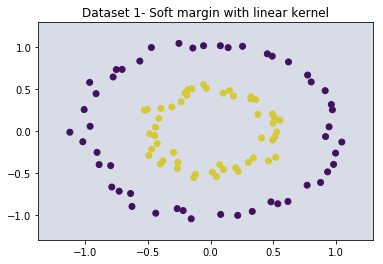

In [113]:
clf = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
print(f1_score(y, r))
p = plot_decision_boudary(clf, X, y, None)
p.title('Dataset 1- Soft margin with linear kernel')
p.savefig('dataset1_soft_margin_with_linear_kernel.png')
p.show()

## (iv) Soft margin SVM with rbf kernel

0.95
1.0


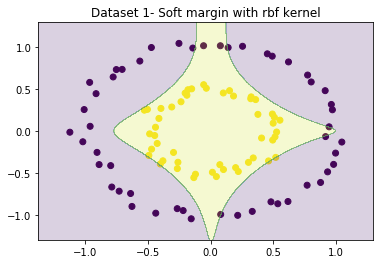

In [116]:
gamma = -4
clf = SVC(kernel='linear', C=1)
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
print(f1_score(y, r))
p = plot_decision_boudary(clf, kX, y, rbf_kernel, gamma)
p.title('Dataset 1- Soft margin with rbf kernel')
p.savefig('dataset1_soft_margin_with_rbf_kernel.png')
p.show()

# Dataset 2

In [23]:
filename = 'data_2.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 2: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 2:  100
Distribution of samples among different classes:  [50 50]


## (i) Scatter the data

In [ ]:
plt.figure()
plt.title('Dataset 2 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset2_plot.png')
plt.show()


## (ii) Plot the dataset with decision boundaries corresponding to the kernel used

1.0
1.0


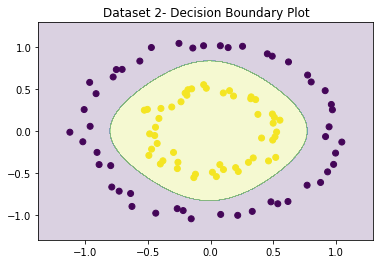

In [105]:
gamma = -1
kX = np.hstack((X, rbf_kernel(X, gamma)))
clf = SVC(kernel='linear', C=100)
clf.fit(kX, y)
r = predict(kX, clf._get_coef()[0], clf.intercept_)
print(score(r, y))
print(f1_score(y, r))
p = plot_decision_boudary(clf, X, y, rbf_kernel, gamma)
p.title('Dataset 2- Decision Boundary Plot')
p.savefig('dataset2_decision_boundary_plot.png')
p.show()

## (iii) Soft margin SVM with linear kernel

0.75


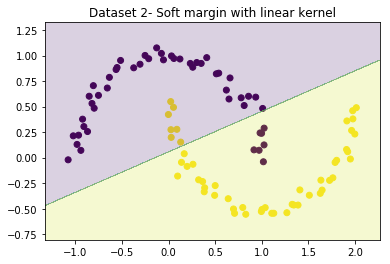

In [26]:
clf = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
print(f1_score(y, r))
p = plot_decision_boudary(clf, X, y, None)
p.title('Dataset 2- Soft margin with linear kernel')
p.savefig('dataset2_soft_margin_with_linear_kernel.png')
p.show()

## (iv) Soft margin SVM with rbf kernel

0.95


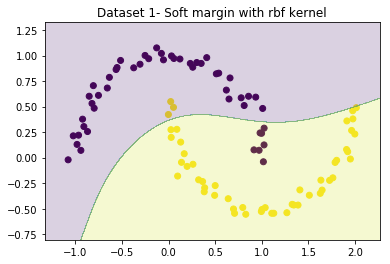

In [27]:
gamma = -1
clf = SVC(kernel='linear', C=1)
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
p = plot_decision_boudary(clf, kX, y, rbf_kernel, gamma)
p.title('Dataset 1- Soft margin with rbf kernel')
p.savefig('dataset1_soft_margin_with_rbf_kernel.png')
p.show()

# Dataset 3

In [28]:
filename = 'data_3.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 3: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 3:  100
Distribution of samples among different classes:  [34 33 33]


## (i) Scatter the data

In [ ]:
plt.figure()
plt.title('Dataset 3 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset3_plot.png')
plt.show()


## One vs All and One vs One

In [40]:
def one_vs_all(X, y, kernel=None, gamma=1):
    kX = X.copy()
    if kernel is not None:
        kX = np.hstack((X, kernel(X, gamma)))
    models = []
    for y_i in range(3):
        y_ = y.copy()
        y_ = (y_ == y_i).astype(int)

        clf = SVC(kernel='linear')
        clf.fit(kX, y_)

        models.append(clf)
    return models


def one_vs_one(X, y, kernel=None, gamma=1):
    models = []
    kX = X.copy()
    if kernel is not None:
        kX = np.hstack((X, kernel(X, gamma)))
    for y_i in range(2):
        for y_j in range(y_i + 1, 3):
            e1 = np.where(y == y_i)[0]
            e2 = np.where(y == y_j)[0]
            y_ = np.hstack((y[e1], y[e2]))
            X_ = np.vstack((kX[e1], kX[e2]))
            p = np.random.permutation(len(X_))
            y_ = y_[p]
            X_ = X_[p]

            clf = SVC(kernel='linear')
            clf.fit(X_, y_)

            models.append(clf)
    return models


## (ii) Plot the dataset with decision boundaries corresponding to the kernel used

### One-vs-All Approach

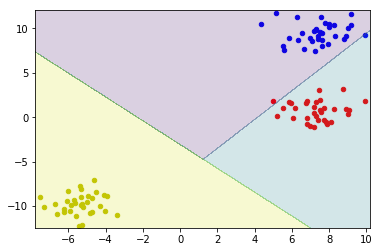

In [37]:
colors = 'bry'
models = one_vs_all(X, y)
idxs = []
pad = 0.25
h = 1000
x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
for y_i in range(3):
    clf = models[y_i]
    w = clf._get_coef()[0]
    b = clf.intercept_

    idx = np.where(predict(np.c_[x1.ravel(), x2.ravel()], w, b) == 1)
    idxs.append(idx)

Z = np.zeros((np.c_[x1.ravel(), x2.ravel()].shape[0]))
for i in range(3):
    Z[idxs[i]] = i
    idx = np.where(y == i)

    plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], cmap=plt.cm.Paired, s=20)

Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.2)

plt.show()


### One-vs-One Approach

1.0


0.5074626865671642


0.0


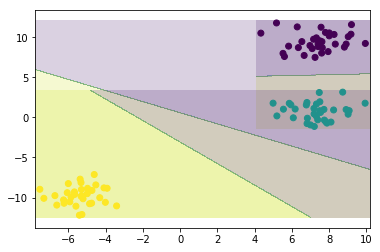

In [32]:
models = one_vs_one(X, y)
k = 0
colors = 'bry'
idxs = []
pad = 0.25
h = 1000
x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
for y_i in range(2):
    for y_j in range(y_i + 1, 3):
        e1 = np.where(y == y_i)[0]
        e2 = np.where(y == y_j)[0]
        X_ = np.vstack((X[e1], X[e2]))
        p = np.random.permutation(len(X_))
        X_ = X_[p]

        clf = models[k]
        k += 1
        
        w = clf._get_coef()[0]
        b = clf.intercept_
        
        x1_min, x1_max = X_[:, 0].min() - pad, X_[:, 0].max() + pad
        x2_min, x2_max = X_[:, 1].min() - pad, X_[:, 1].max() + pad
        x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
        
        idx = np.where(predict(np.c_[x1.ravel(), x2.ravel()], w, b) == 1)
        idxs.append(idx)


        Z = predict(np.c_[x1.ravel(), x2.ravel()], w, b)
        Z = Z.reshape(x1.shape)
        plt.contourf(x1, x2, Z, alpha=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


## (iii) Soft margin SVM with linear kernel

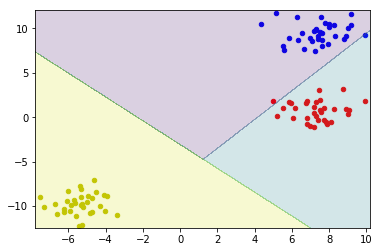

In [39]:
colors = 'bry'
models = one_vs_all(X, y)
idxs = []
pad = 0.25
h = 1000
x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
for y_i in range(3):
    clf = models[y_i]
    w = clf._get_coef()[0]
    b = clf.intercept_

    idx = np.where(predict(np.c_[x1.ravel(), x2.ravel()], w, b) == 1)
    idxs.append(idx)

Z = np.zeros((np.c_[x1.ravel(), x2.ravel()].shape[0]))
for i in range(3):
    Z[idxs[i]] = i
    idx = np.where(y == i)

    plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], cmap=plt.cm.Paired, s=20)

Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.2)

plt.show()

## (iv) Soft margin SVM with rbf kernel

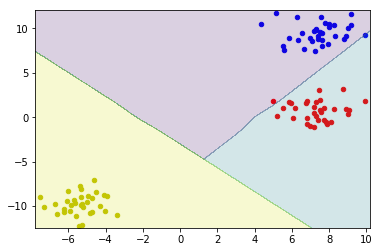

In [46]:
colors = 'bry'
gamma = -1
models = one_vs_all(X, y, rbf_kernel, gamma=gamma)
idxs = []
pad = 0.25
h = 1000
x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
for y_i in range(3):
    clf = models[y_i]
    w = clf._get_coef()[0]
    b = clf.intercept_

    Z = predict(np.c_[x1.ravel(), x2.ravel(), rbf_kernel(x1.ravel(), gamma), rbf_kernel(x2.ravel(), gamma)], w, b)
    idx = np.where(Z == 1)
    idxs.append(idx)

Z = np.zeros((np.c_[x1.ravel(), x2.ravel(), rbf_kernel(x1.ravel(), gamma), rbf_kernel(x2.ravel(), gamma)].shape[0]))
for i in range(3):
    Z[idxs[i]] = i
    idx = np.where(y == i)

    plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], cmap=plt.cm.Paired, s=20)

Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.2)

plt.show()

## Dataset 4

In [105]:
filename = 'data_4.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 4: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 4:  2000
Distribution of samples among different classes:  [1000 1000]


### Scatter the data

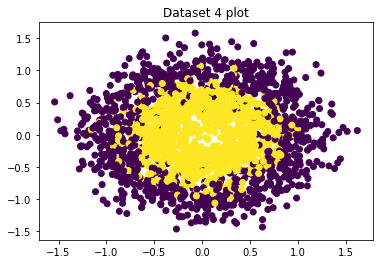

In [106]:
plt.figure()
plt.title('Dataset 4 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset4_plot.png')
plt.show()

0.8835


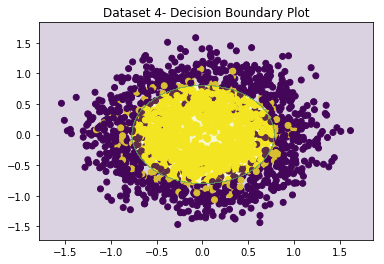

In [107]:
kX = np.hstack((X, poly_kernel(X)))
clf = SVC(kernel='linear')
clf.fit(kX, y)
r = predict(kX, clf._get_coef()[0], clf.intercept_)
print(score(r, y))
p = plot_decision_boudary(clf, kX, y, poly_kernel)
p.title('Dataset 4- Decision Boundary Plot')
p.savefig('dataset4_decision_boundary_plot.png')
p.show()

## Soft margin SVM with linear kernel

0.55


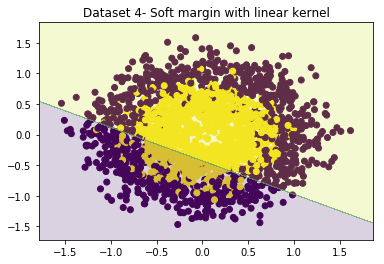

In [109]:
clf = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
p = plot_decision_boudary(clf, X, y, None)
p.title('Dataset 4- Soft margin with linear kernel')
p.savefig('dataset4_soft_margin_with_linear_kernel.png')
p.show()

## Soft margin SVM with rbf kernel

0.8775


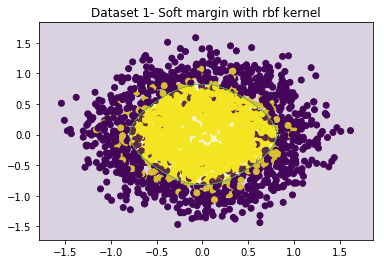

In [110]:
gamma = -1
clf = SVC(kernel='linear', C=1)
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print(score(r, y_test))
p = plot_decision_boudary(clf, kX, y, rbf_kernel, gamma)
p.title('Dataset 1- Soft margin with rbf kernel')
p.savefig('dataset1_soft_margin_with_rbf_kernel.png')
p.show()